In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
from skimage.feature import peak_local_max

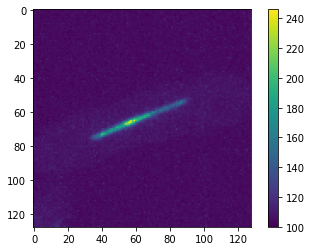

In [29]:
im = imread('test_im.tif')
plt.imshow(im)
plt.colorbar()

In [4]:
# hough space represents normal line as rho = x*cos(theta) + y*sin(theta), where normal line is perpendicular
# line that intersects origin
# rho is length of normal line

In [10]:
d = np.sqrt(im.shape[0]**2 + im.shape[1]**2) # image diagonal length (max normal line length)
d = int(d)

In [32]:
rhos = np.arange(-d, d, step=1)
thetas = np.arange(0, 180, step=1)
thetas = np.deg2rad(thetas)

cos_thetas = np.cos(thetas)
sin_thetas = np.sin(thetas)

accumulator = np.zeros((len(rhos), len(thetas)))

for y in range(im.shape[0]):
    for x in range(im.shape[1]):
        loc = [y-im.shape[0]/2, x-im.shape[1]/2]
        ys, xs = [], []
        for theta_idx in range(len(thetas)):
            rho = x*cos_thetas[theta_idx] + y*sin_thetas[theta_idx]
            theta = thetas[theta_idx]
            rho_idx = np.argmin(np.abs(rhos-rho))
            accumulator[rho_idx][theta_idx] += im[y][x]/(len(thetas))

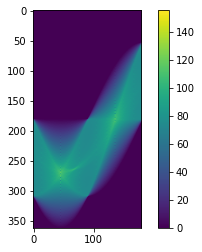

In [33]:
plt.imshow(accumulator)
plt.colorbar()

In [37]:
coordinates = peak_local_max(accumulator, min_distance=20)
coordinates

array([[269,  45],
       [182, 135]])

In [39]:
rhos[269]

88

In [40]:
rhos[182]

1

In [43]:
a = [np.cos(np.deg2rad(thetas[45])), np.cos(np.deg2rad(thetas[135]))]
a

[0.9999060498015505, 0.999154554130315]

In [46]:
b = [np.sin(np.deg2rad(thetas[45])), np.sin(np.deg2rad(thetas[135]))]
b

[0.013707354604707477, 0.04111176182859931]

In [50]:
x0 = 88*a[0]
y0 = 88*b[0]
x0, y0

(87.99173238253644, 1.2062472052142579)

In [51]:
x02 = 1*a[1]
y02 = 1*b[1]
x02, y02

(0.999154554130315, 0.04111176182859931)

In [2]:
stack = imread('test_stack.tif')
stack.shape

(10, 128, 128)

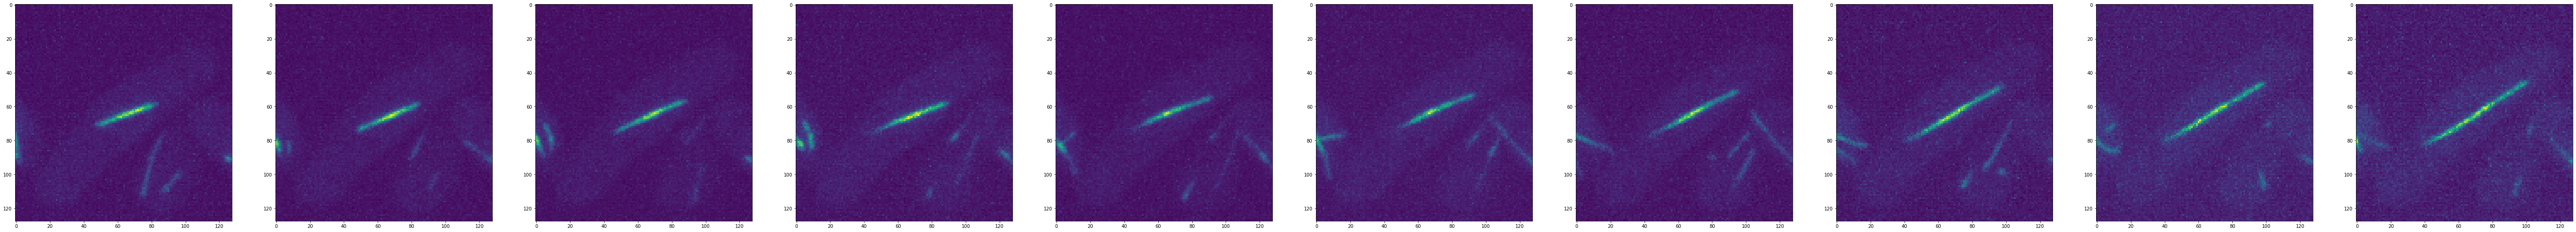

In [10]:
fig_raw, ax_raw = plt.subplots(1,stack.shape[0], figsize=(100,10))
for i in range(stack.shape[0]):
    ax_raw[i].imshow(stack[i])

In [25]:
tup = (1, 'cat', 2)

In [42]:
my_list = [1, 2, 3]

In [43]:
my_list[1] = 8